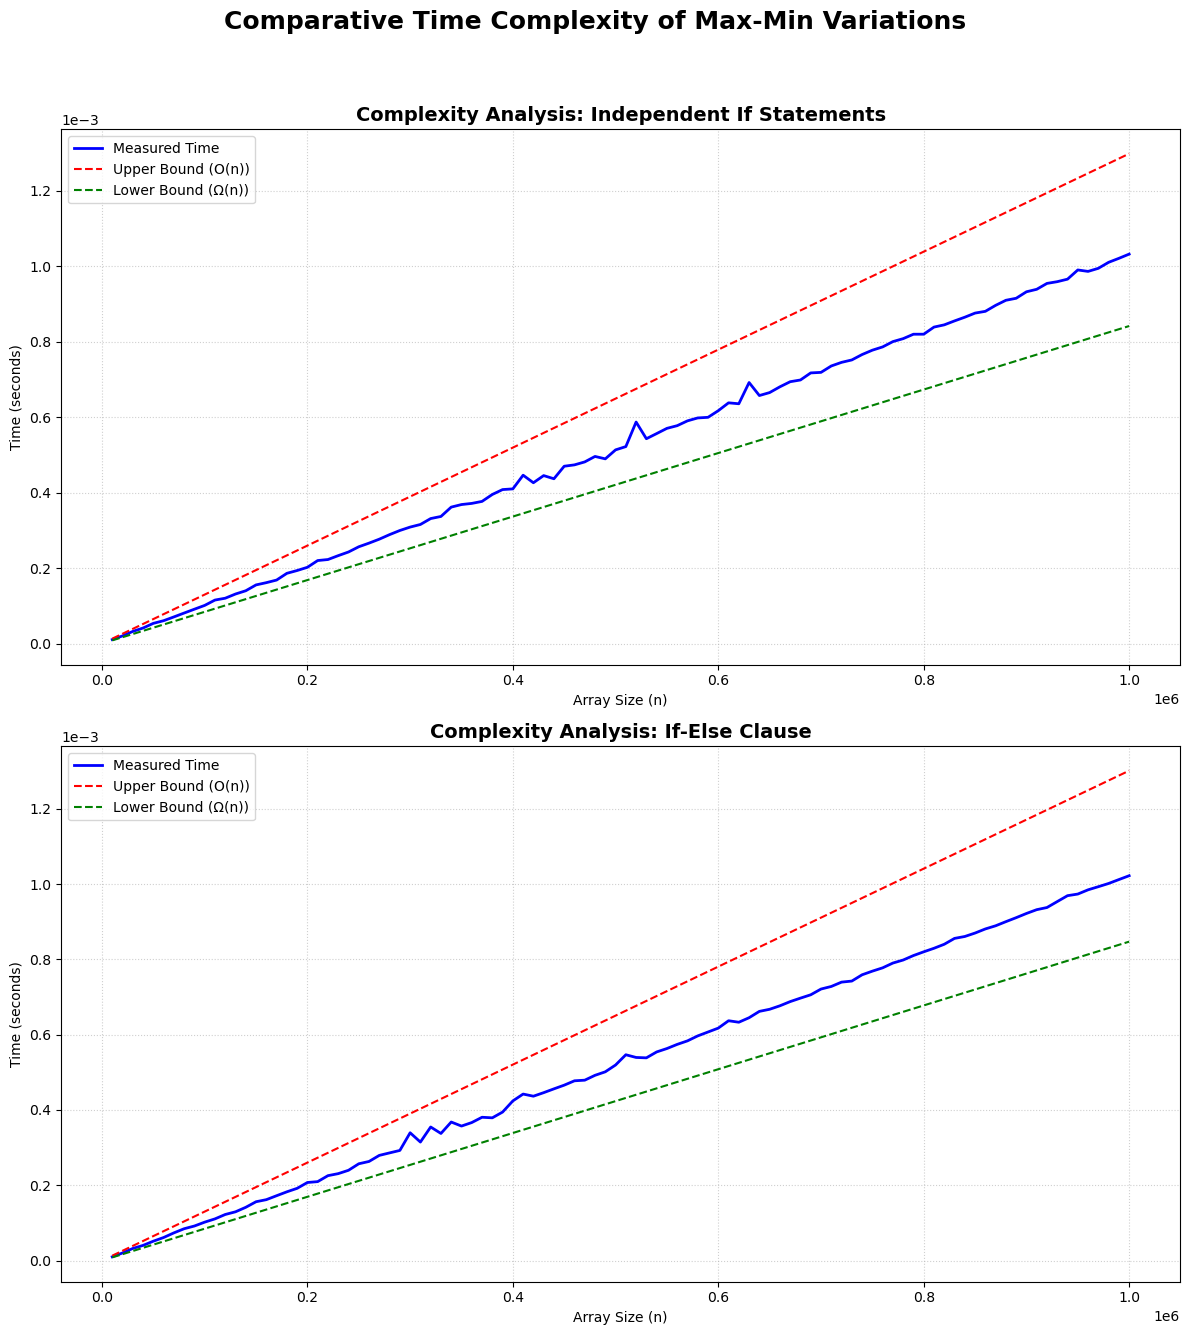

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_max_min_analysis():
    df = pd.read_csv("max_min_results.csv")
    n = df['Size']
    
    plt.style.use('seaborn-v0_8-muted')
    fig, axes = plt.subplots(2, 1, figsize=(12, 14))

    variants = [
        ('IndependentTime', 'Independent If Statements', 0),
        ('IfElseTime', 'If-Else Clause', 1)
    ]

    for col, title, idx in variants:
        t = df[col]
        
        # Calculate bounds based on the data to show clear containment
        c_upper = max(t / n) * 1.15
        c_lower = min(t / n) * 0.85
        
        upper_bound = c_upper * n
        lower_bound = c_lower * n

        axes[idx].plot(n, t, color='blue', label='Measured Time', linewidth=2)
        axes[idx].plot(n, upper_bound, color='red', linestyle='--', label=f'Upper Bound (O(n))')
        axes[idx].plot(n, lower_bound, color='green', linestyle='--', label=f'Lower Bound (Ω(n))')

        axes[idx].set_title(f"Complexity Analysis: {title}", fontsize=14, fontweight='bold')
        axes[idx].set_xlabel("Array Size (n)")
        axes[idx].set_ylabel("Time (seconds)")
        axes[idx].legend()
        axes[idx].grid(True, linestyle=':', alpha=0.6)
        axes[idx].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.suptitle("Comparative Time Complexity of Max-Min Variations", fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('max_min_analysis.png')
    plt.show()

plot_max_min_analysis()

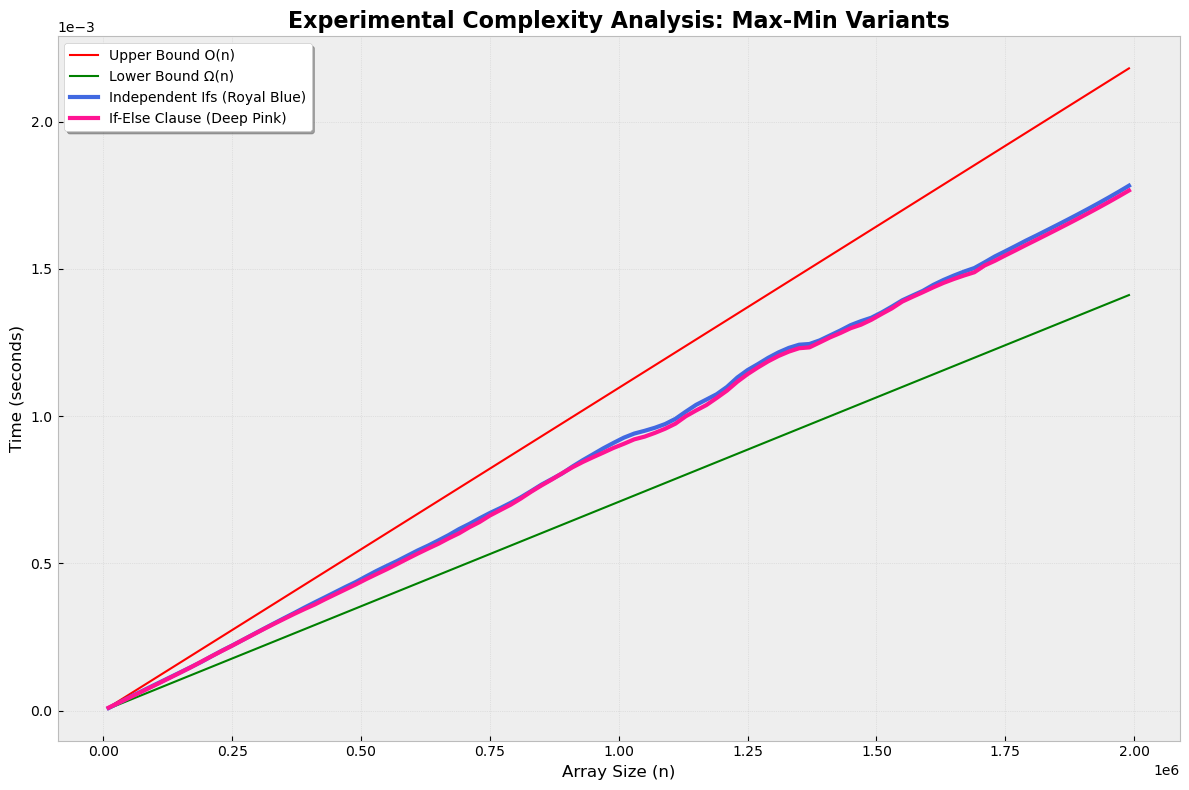

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_contrasting_max_min():
    df = pd.read_csv("max_min_comparison.csv")
    n = df['Size']
    
    # Smooth data to highlight the linear slope
    t_ind = savgol_filter(df['IndependentTime'], 17, 3)
    t_ifelse = savgol_filter(df['IfElseTime'], 17, 3)
    
    plt.figure(figsize=(12, 8))
    plt.style.use('bmh') # Using a clean background style

    # Asymptotic Bounds (Solid Lines as requested)
    c_upper = max(t_ind / n) * 1.18
    c_lower = min(t_ifelse / n) * 0.82
    
    plt.plot(n, c_upper * n, color='red', linewidth=1.5, label='Upper Bound O(n)')
    plt.plot(n, c_lower * n, color='green', linewidth=1.5, label='Lower Bound Ω(n)')

    # Algorithm Performance Lines (High Contrast Colors)
    plt.plot(n, t_ind, color='#4169E1', linewidth=3, label='Independent Ifs (Royal Blue)')
    plt.plot(n, t_ifelse, color='#FF1493', linewidth=3, label='If-Else Clause (Deep Pink)')

    plt.title("Experimental Complexity Analysis: Max-Min Variants", fontsize=16, fontweight='bold')
    plt.xlabel("Array Size (n)", fontsize=12)
    plt.ylabel("Time (seconds)", fontsize=12)
    plt.legend(fontsize=10, frameon=True, shadow=True, facecolor='white')
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.tight_layout()
    plt.savefig('max_min_high_contrast.png')
    plt.show()

plot_contrasting_max_min()